In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
ruta_datos = 'Datos/df_unemployment_rates.csv'

In [3]:
# Verificar información general del DataFrame
df = pd.read_csv(ruta_datos)
print("Información del DataFrame:")
df.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             917 non-null    object 
 1   overall_rate     917 non-null    float64
 2   age_16_17_rate   917 non-null    float64
 3   age_16_19_rate   917 non-null    float64
 4   age_18_19_rate   917 non-null    float64
 5   age_16_24_rate   917 non-null    float64
 6   age_20_24_rate   917 non-null    float64
 7   age_25_34_rate   917 non-null    float64
 8   age_25_54_rate   917 non-null    float64
 9   age_35_44_rate   917 non-null    float64
 10  age_45_54_rate   917 non-null    float64
 11  age_20plus_rate  917 non-null    float64
 12  age_25plus_rate  917 non-null    float64
 13  age_55plus_rate  917 non-null    float64
dtypes: float64(13), object(1)
memory usage: 100.4+ KB


In [4]:
# Comprobar si hay valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
date               0
overall_rate       0
age_16_17_rate     0
age_16_19_rate     0
age_18_19_rate     0
age_16_24_rate     0
age_20_24_rate     0
age_25_34_rate     0
age_25_54_rate     0
age_35_44_rate     0
age_45_54_rate     0
age_20plus_rate    0
age_25plus_rate    0
age_55plus_rate    0
dtype: int64


In [5]:
df.describe()

,overall_rate,age_16_17_rate,age_16_19_rate,age_18_19_rate,age_16_24_rate,age_20_24_rate,age_25_34_rate,age_25_54_rate,age_35_44_rate,age_45_54_rate,age_20plus_rate,age_25plus_rate,age_55plus_rate
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,5.694656,17.816249,15.964122,14.711887,11.620938,9.260414,5.481243,4.562704,4.200763,3.823010,5.008724,4.419956,3.799019
std,1.710558,4.549448,3.953972,3.820889,2.926132,2.702278,1.871032,1.547989,1.403485,1.313785,1.613382,1.458376,1.194012
min,2.500000,6.500000,6.400000,5.500000,4.800000,3.500000,1.900000,1.900000,1.700000,1.600000,2.200000,2.000000,1.700000
25%,4.400000,15.100000,13.400000,12.100000,9.600000,7.400000,4.100000,3.400000,3.200000,2.900000,3.800000,3.300000,3.000000
50%,5.500000,17.800000,16.000000,14.600000,11.600000,9.000000,5.200000,4.300000,4.000000,3.500000,4.800000,4.100000,3.500000
75%,6.700000,20.300000,18.000000,16.600000,13.100000,10.700000,6.600000,5.500000,5.000000,4.400000,6.000000,5.300000,4.400000
max,14.800000,31.700000,32.800000,34.600000,27.500000,25.500000,14.600000,12.800000,11.500000,12.300000,14.200000,13.000000,13.600000


In [6]:
# Comprobar si hay filas duplicadas
print(f"Filas duplicadas: {df.duplicated().sum()}")

Filas duplicadas: 0


In [7]:
# Convertir la columna 'date' a formato de fecha
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Establecer la columna 'date' como índice
df.set_index('date', inplace=True)

In [9]:
# Seleccionar solo la columna de interés
unemployment_rate = df['overall_rate']

print(unemployment_rate.head())

date
1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
Name: overall_rate, dtype: float64


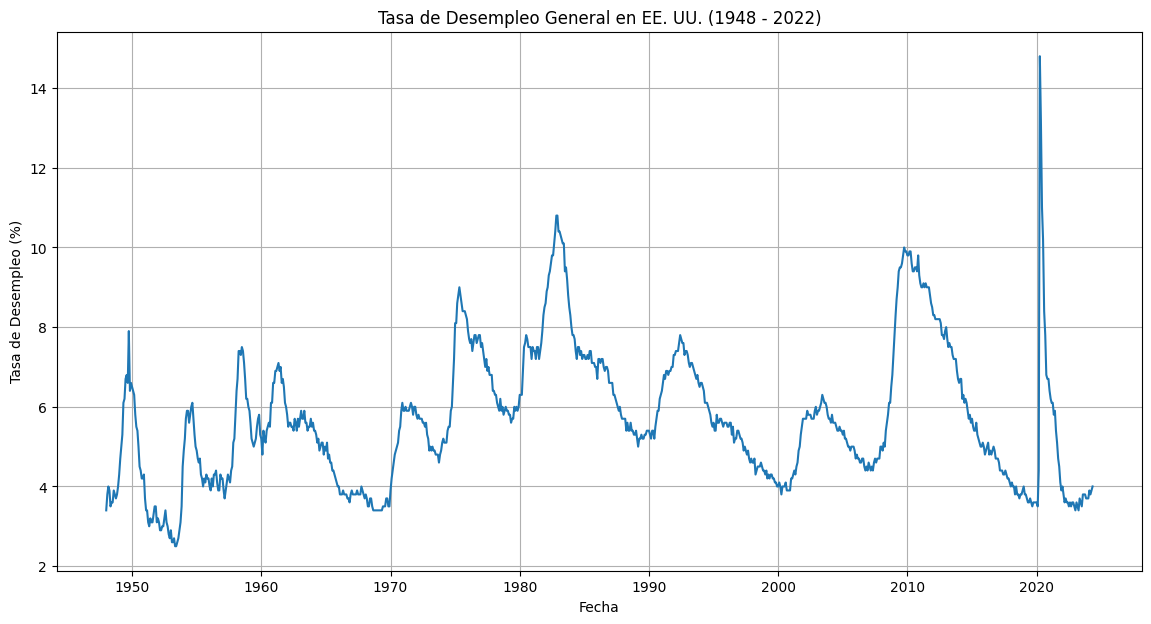

In [10]:
# Gráfico de la serie de tiempo de la tasa de desempleo
plt.figure(figsize=(14, 7))
plt.plot(unemployment_rate)
plt.title('Tasa de Desempleo General en EE. UU. (1948 - 2022)')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Desempleo (%)')
plt.grid(True)
plt.show()

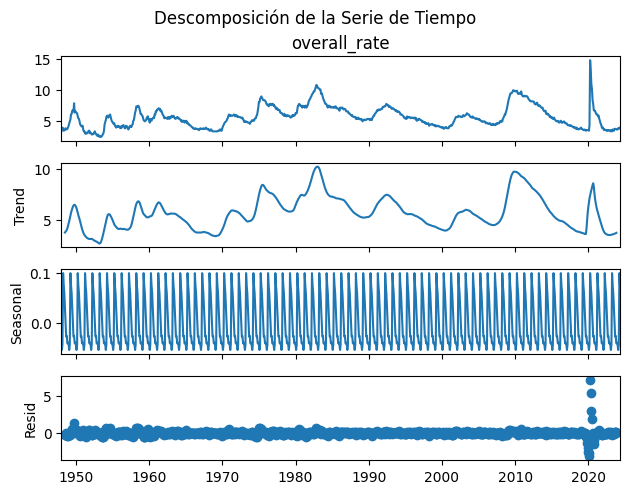

In [11]:
# Descomposición de la serie de tiempo (modelo aditivo)
decomposition = seasonal_decompose(unemployment_rate, model='additive', period=12) # Periodo de 12 para datos mensuales
decomposition.plot()
plt.suptitle('Descomposición de la Serie de Tiempo', y=1.02)
plt.show()

# Modelo ARIMA para predecir la tasa de desempleo



In [12]:
# Dividir los datos
train_size = int(len(unemployment_rate) * 0.8)
train_data = unemployment_rate[:train_size]
test_data = unemployment_rate[train_size:]

In [13]:
# Ajustar el modelo ARIMA (p=5, d=1, q=0)
model = ARIMA(train_data, order=(5, 0, 0))
model_fit = model.fit()

d:\S\eco_desempleo\_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\S\eco_desempleo\_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\S\eco_desempleo\_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
# Hacer el pronóstico
forecast = model_fit.forecast(steps=len(test_data))
forecast.index = test_data.index

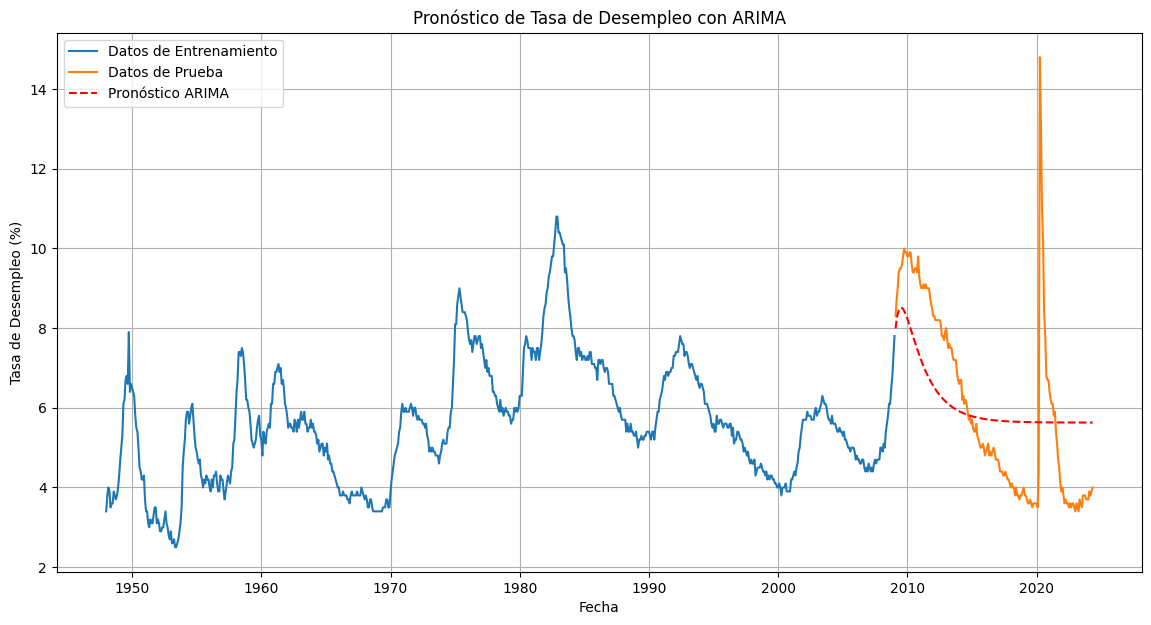

In [15]:
# Graficar el pronóstico
plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Datos de Entrenamiento')
plt.plot(test_data, label='Datos de Prueba')
plt.plot(forecast, label='Pronóstico ARIMA', color='red', linestyle='--')
plt.title('Pronóstico de Tasa de Desempleo con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Desempleo (%)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Evaluar el modelo usando el Error Cuadrático Medio de la Raíz (RMSE)
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE (Root Mean Squared Error): {rmse:.4f}')

RMSE (Root Mean Squared Error): 1.8358
